# DIGIT CLASSIFIER

## IMPORTING PACKAGES

In [1]:
import tensorflow

In [2]:
import keras
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization
from keras.datasets import mnist
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
#To igonore warnings
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.



## LOADING DATASET

### MNIST DATASET

**Mnist dataset is a classic Computer vision dataset . It is like "Hello World" program for coding . Training set consist of  60000 examples of 28*28 px images and testing set contain 10000 images of same pixel** 

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
print(x_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


### LET'S TASTE DATA

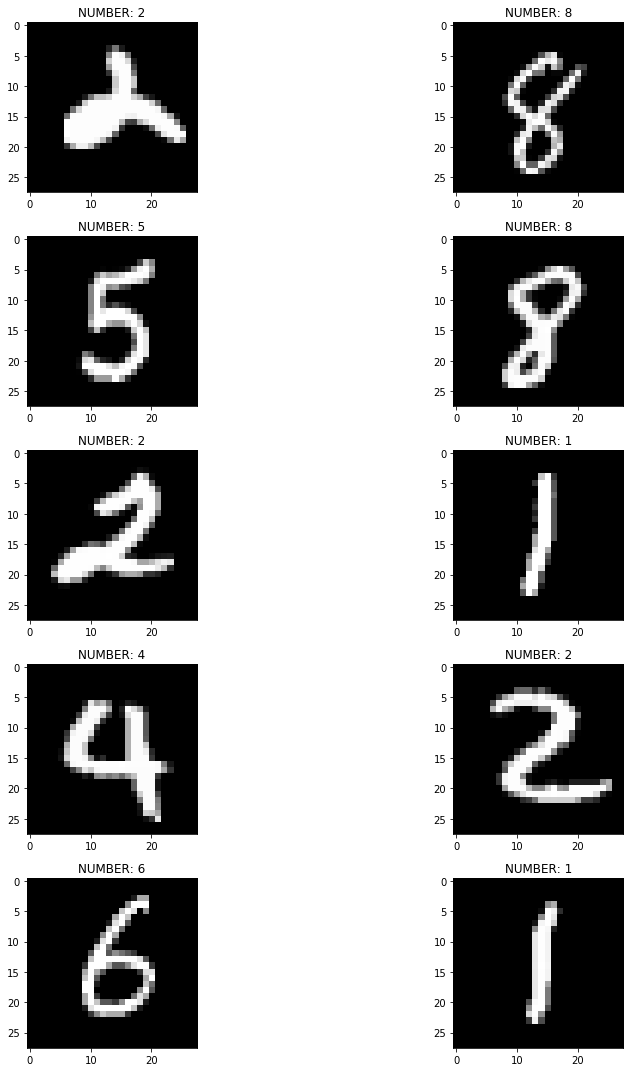

In [5]:
#Randomly selecting 6 images
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=np.random.randint(0,len(x_train))
        ax[i,j].imshow(x_train[l],cmap='gray')
        ax[i,j].set_title('NUMBER: '+str(y_train[l]))
        
plt.tight_layout()

### DATA PREPROCESSING


**1.) As train and test set label contain numbers values between 0  to 9 we will convert all of them into separate columns**<br>
**2.) As pixel value is between 0 to 255 we will normalize it so it will contain value between 0 and 1**

In [6]:
#Normalizing the pixel values
x_train=x_train/255
x_test=x_test/255

In [7]:
#Label column into categorical column
y_train=pd.get_dummies(y_train)
y_test=pd.get_dummies(y_test)

In [8]:
#Reshaping the training and validation set as convolutional neural network accept only 3 dimensional data
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

## CONVOLUTIONAL NEURAL NETWORK 

In [9]:
model=Sequential()

In [10]:
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

**Thus in this network we have to model 1,199,882 total trainable parameters.Out of which only 18,816 are due to covillutional layer and remaining are due to dense layers . This is the power of CNN**

In [12]:
#We are using adam optimizer it is a combination of stochastic gradient descent with momentum and RMS prop
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
train1=model.fit(x_train,y_train,batch_size=128,validation_split=0.3,epochs=20)

Instructions for updating:
Use tf.cast instead.
Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 148s 4ms/step - loss: 0.3040 - acc: 0.9067 - val_loss: 0.0805 - val_acc: 0.9758
Epoch 2/20
42000/42000 [==============================] - 147s 4ms/step - loss: 0.1038 - acc: 0.9694 - val_loss: 0.0570 - val_acc: 0.9828
Epoch 3/20
42000/42000 [==============================] - 138s 3ms/step - loss: 0.0779 - acc: 0.9760 - val_loss: 0.0539 - val_acc: 0.9844
Epoch 4/20
42000/42000 [==============================] - 138s 3ms/step - loss: 0.0619 - acc: 0.9808 - val_loss: 0.0453 - val_acc: 0.9867
Epoch 5/20
42000/42000 [==============================] - 137s 3ms/step - loss: 0.0523 - acc: 0.9835 - val_loss: 0.0437 - val_acc: 0.9872
Epoch 6/20
42000/42000 [==============================] - 143s 3ms/step - loss: 0.0436 - acc: 0.9867 - val_loss: 0.0426 - val_acc: 0.9881
Epoch 7/20
42000/42000 [==============================] - 141s 3ms/step - 

# LET"S VISUALIZE HOW TRAINING GOES ON

## TRAINING LOSS V/S VALIDATION LOSS 

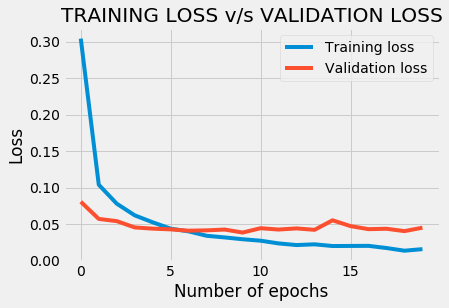

In [14]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.plot(train1.history['loss'],label='Training loss')
plt.plot(train1.history['val_loss'],label='Validation loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('TRAINING LOSS v/s VALIDATION LOSS')
plt.legend(loc='upper right')
plt.show()

## TRAINING ACCURACY v/s VALIDATION ACCURACY 

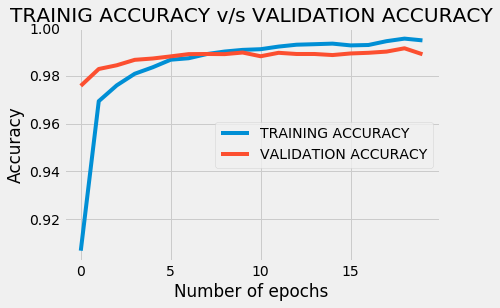

In [15]:
plt.plot(train1.history['acc'],label='TRAINING ACCURACY')
plt.plot(train1.history['val_acc'],label='VALIDATION ACCURACY')
plt.legend(loc='center right')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('TRAINIG ACCURACY v/s VALIDATION ACCURACY')
plt.show()

##  LET'S PREDICT ON TEST SET AND FIND ACCURACY

In [16]:
test_loss,accuracy_score=model.evaluate(x_test,y_test)

10000/10000 [==============================] - 10s 1ms/step


In [17]:
print(accuracy_score*100)

99.0


**We got 99.0 accuracy on the test set which seems insane but it is very simple dataset !!!!!**

In [18]:
y_test=np.asarray(y_test)
actual_pred=[np.argmax(i) for i in y_test]
pred=model.predict(x_test)
pred=[np.argmax(k) for k in pred]

In [19]:
x_test=x_test.reshape(10000,28,28)

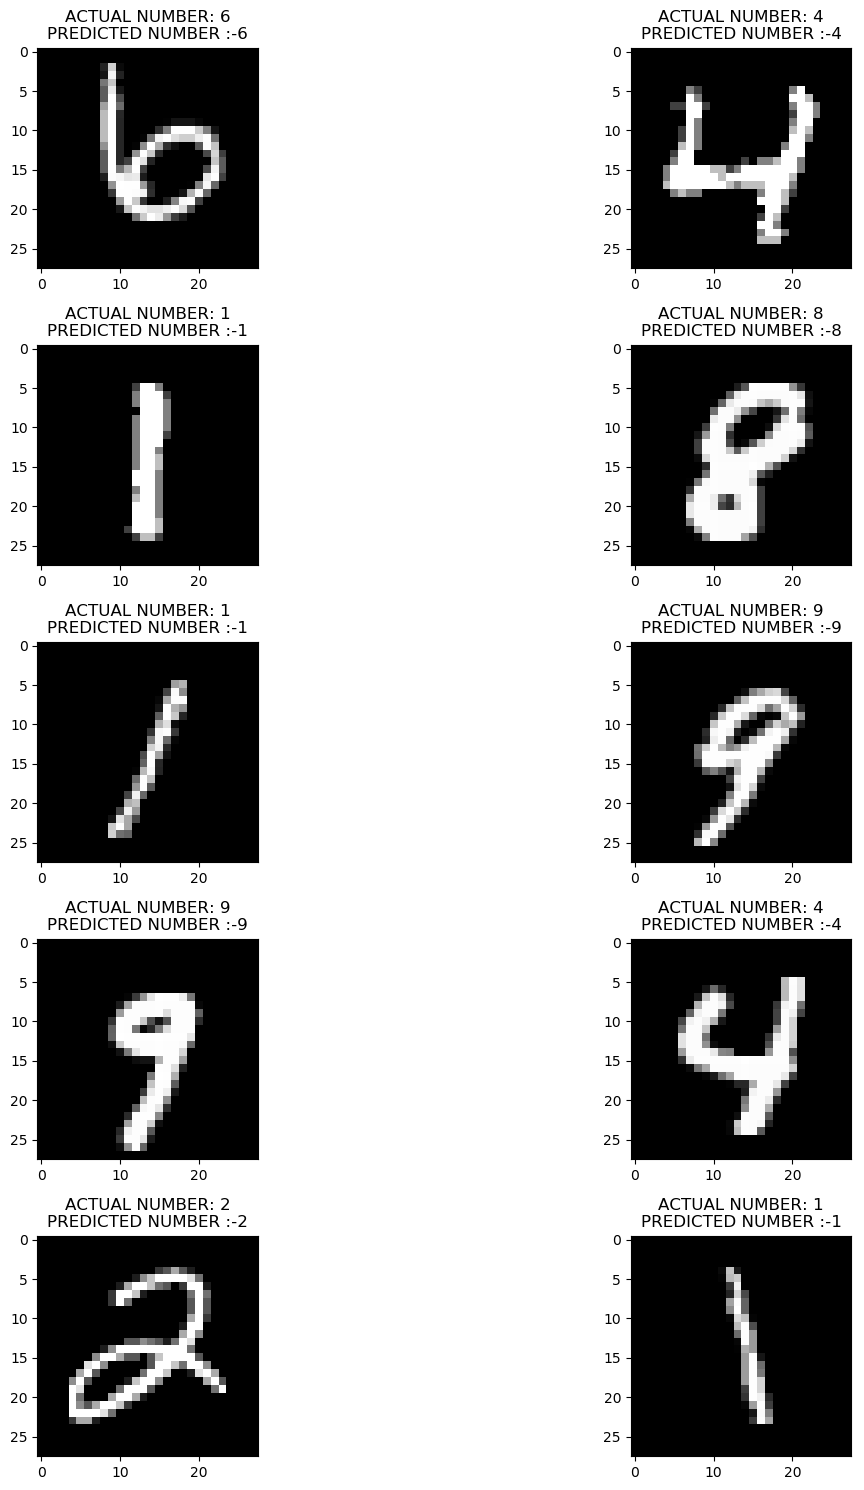

In [20]:
#Randomly selecting 6 images
plt.style.use('default')
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=np.random.randint(0,len(x_test))
        ax[i,j].imshow(x_test[l],cmap='gray')
        ax[i,j].set_title('ACTUAL NUMBER: '+str(actual_pred[l])+'\n'+'PREDICTED NUMBER :-'+str(pred[l]))
        
plt.tight_layout()

**Out of ten images our all predictions are correct**

# ARTIFICIAL NEURAL NETWORK (MULTILAYER PRECEPTRON)

In [21]:
(x_train_ann,y_train_ann),(x_test_ann,y_test_ann)=mnist.load_data()

In [22]:
print(x_train_ann.shape,y_train_ann.shape)

(60000, 28, 28) (60000,)


In [23]:
print(x_test_ann.shape,y_test_ann.shape)

(10000, 28, 28) (10000,)


**Our training set contains  60000 grey scale images and 10000 grey scale image as testing set**

In [24]:
#Normalizing the pixel values
x_train_ann=x_train_ann/255
x_test_ann=x_test_ann/255
#Making dummy variable
y_train_ann=pd.get_dummies(y_train_ann)
y_test_ann=pd.get_dummies(y_test_ann)

In [25]:
#Converting the iamges into a single vector as mmlp only takes a single vector
x_train_ann=x_train_ann.reshape(60000,784)
x_test_ann=x_test_ann.reshape(10000,784)

In [26]:
model1=Sequential()
#The problem of vanishing and exploding gradient descent is solved by using relu in hidden layers and he_noemal initilazation
model1.add(Dense(512,activation='relu',kernel_initializer='he_normal',input_shape=(784,)))
model1.add(Dropout(0.2))
#Adding batch normalization for problem of covariate shift and faster convergence
model1.add(keras.layers.BatchNormalization())
model1.add(Dense(512,activation='relu',kernel_initializer='he_normal'))
model1.add(Dropout(0.2))
model1.add(BatchNormalization())
model1.add(Dense(10,activation='softmax'))

#### MODEL SUMMARY

In [27]:
print(model1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total para

**WE have two dense layer and two dropout layer each of size 512 neurons and a output layer with 10 neuron . Total Trainiable params is 669706**

#### FITTING THE MODEL

In [28]:
#we will use here adam1 optimizer
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [29]:
train=model1.fit(x_train_ann,y_train_ann,batch_size=128,validation_split=0.3,epochs=20)

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 16s 392us/step - loss: 0.2692 - acc: 0.9165 - val_loss: 0.1245 - val_acc: 0.9606
Epoch 2/20
42000/42000 [==============================] - 16s 379us/step - loss: 0.1157 - acc: 0.9636 - val_loss: 0.1088 - val_acc: 0.9669
Epoch 3/20
42000/42000 [==============================] - 15s 357us/step - loss: 0.0803 - acc: 0.9747 - val_loss: 0.0998 - val_acc: 0.9697
Epoch 4/20
42000/42000 [==============================] - 15s 362us/step - loss: 0.0659 - acc: 0.9789 - val_loss: 0.0922 - val_acc: 0.9747
Epoch 5/20
42000/42000 [==============================] - 15s 369us/step - loss: 0.0608 - acc: 0.9803 - val_loss: 0.0905 - val_acc: 0.9741
Epoch 6/20
42000/42000 [==============================] - 14s 337us/step - loss: 0.0477 - acc: 0.9839 - val_loss: 0.0928 - val_acc: 0.9740
Epoch 7/20
42000/42000 [==============================] - 14s 337us/step - loss: 0.0419 - acc: 0.9859 - val_loss: 0.

#### GRAPHICAL REPRESENTATION

#### VALIDATION LOSS V/S TRAINING LOSS

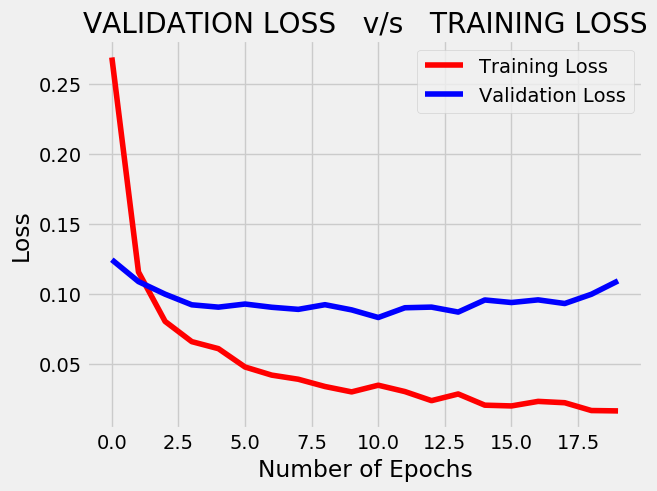

In [30]:
#Plot of validation loss and training loss
plt.style.use('fivethirtyeight')
plt.plot(train.history['loss'],color='red',label='Training Loss')
plt.plot(train.history['val_loss'],color='blue',label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('VALIDATION LOSS   v/s   TRAINING LOSS')
plt.show()

#### VALIDATION ACCURACY VS TRAINING ACCURACY

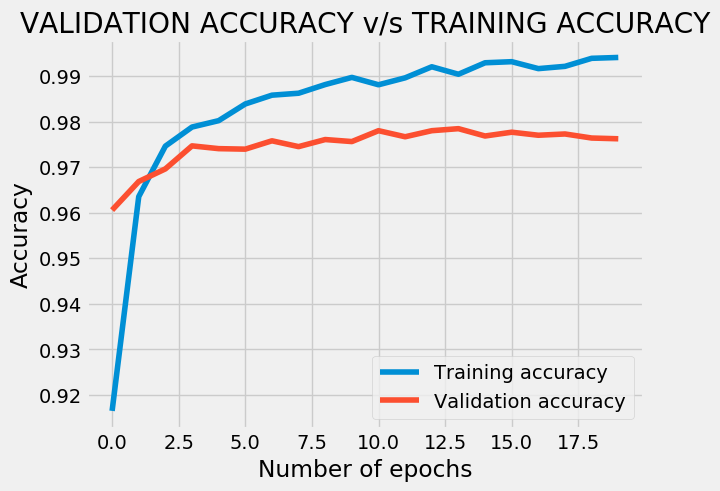

In [31]:
plt.plot(train.history['acc'],label='Training accuracy')
plt.plot(train.history['val_acc'],label='Validation accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('VALIDATION ACCURACY v/s TRAINING ACCURACY')
plt.show()

In [32]:
testing_loss,testing_accuracy=model1.evaluate(x_test_ann,y_test_ann)

10000/10000 [==============================] - 1s 113us/step


In [33]:
print('testing_loss ----->{}'.format(testing_loss))
print('testing_accuracy----->{}'.format(testing_accuracy))

testing_loss ----->0.0857257650131316
testing_accuracy----->0.9787


#### PREDICTIONS

In [34]:
#predicting the result
x_test=x_test.reshape(10000,28,28,1)
result=model.predict(x_test)

In [35]:
x_test=x_test.reshape(10000,784)
result_mlp=model1.predict(x_test)

In [36]:
#Taking the number which has maximum probability
mlp_prediction=[np.argmax(i) for i in result_mlp]
#cnn_prediction=[np.argmax(k) for k in result]
actualprediction=[np.argmax(j) for j in y_test]

In [37]:
#Reshaping the images into 28*28 pixel images
x_test=x_test.reshape(10000,28,28)

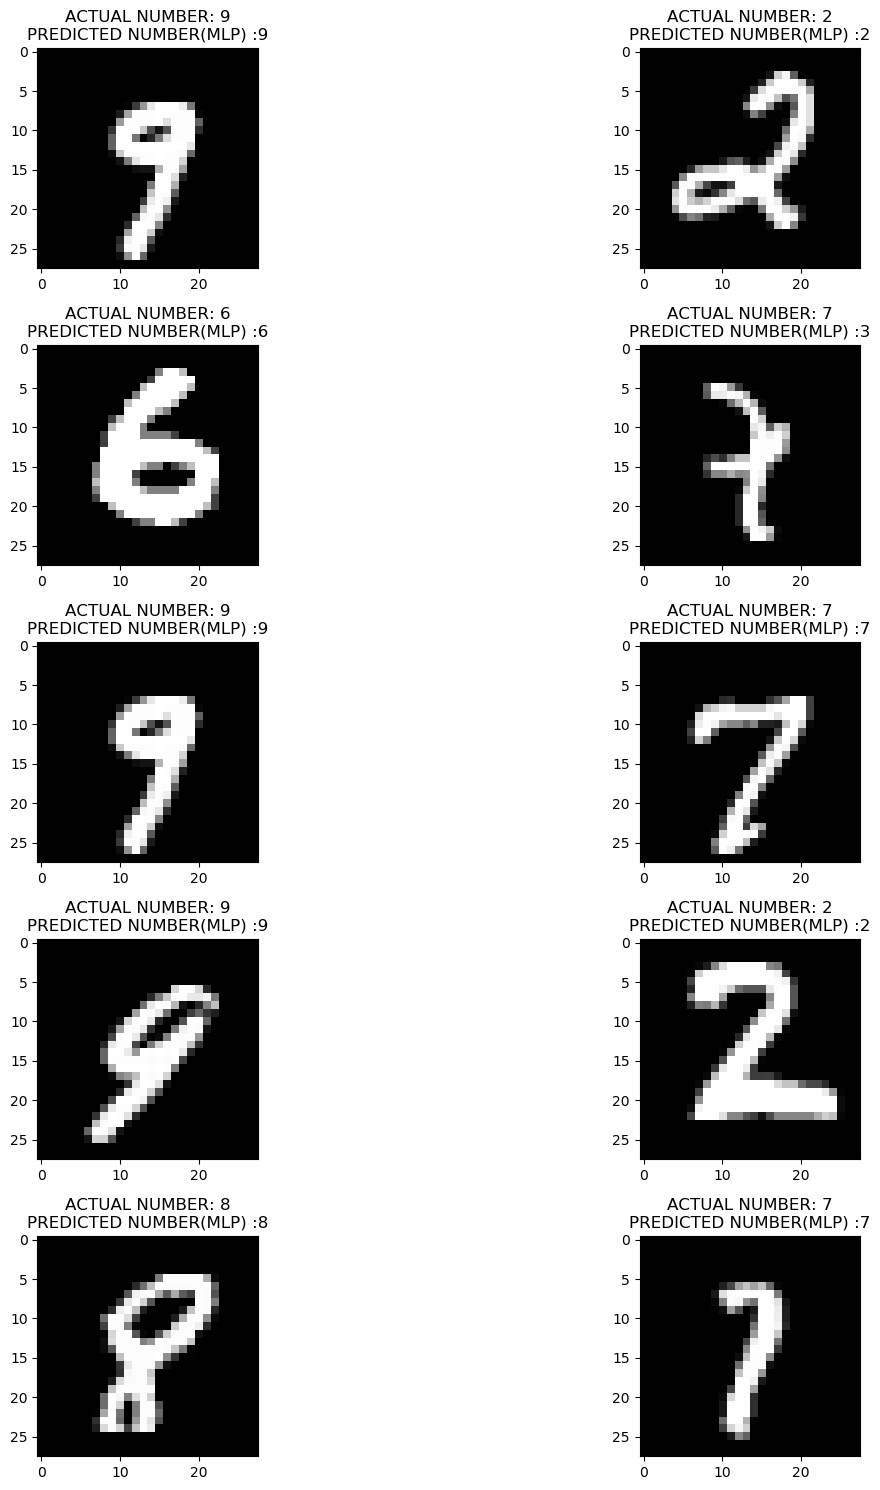

In [39]:
#Randomly selecting 6 images
plt.style.use('default')
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=np.random.randint(0,len(x_test))
        ax[i,j].imshow(x_test[l],cmap='gray')
        ax[i,j].set_title('ACTUAL NUMBER: '+str(actualprediction[l])+'\n'+'PREDICTED NUMBER(MLP) :'+str(mlp_prediction[l]))
        
plt.tight_layout()

**WE have 10 examples out of which  our both model predicts all correct because this is very low quality images with all the data centered in the middle  this is amazing but for computer vision task cnn always if not always does a great job !!!!**

# SAVING THE CNN MODEL

## CNN

In [40]:
##Saving architecture of json file
model_json=model.to_json()
with open('cnn_model.json','w') as json_file :
   json_file.write(model_json)

In [41]:
#Saving the weights of the neural networks
model.save_weights('cnn_model.h5')

## ANN

In [42]:
##Saving architecture in json file
model1_json=model1.to_json()
with open('ann_model.json','w') as json1_file :
    json1_file.write(model1_json)

In [43]:
##Saving weights 
model1.save_weights('ann_model.h5')